# THE MEAN
The sum of the distances between the mean and the values are equal below and above the mean. It is the center point of the level.
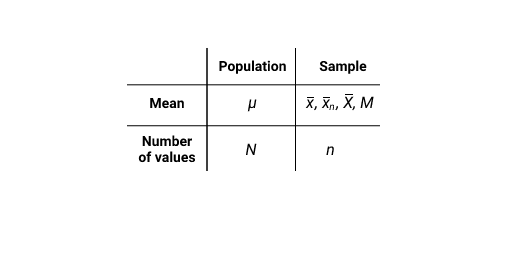

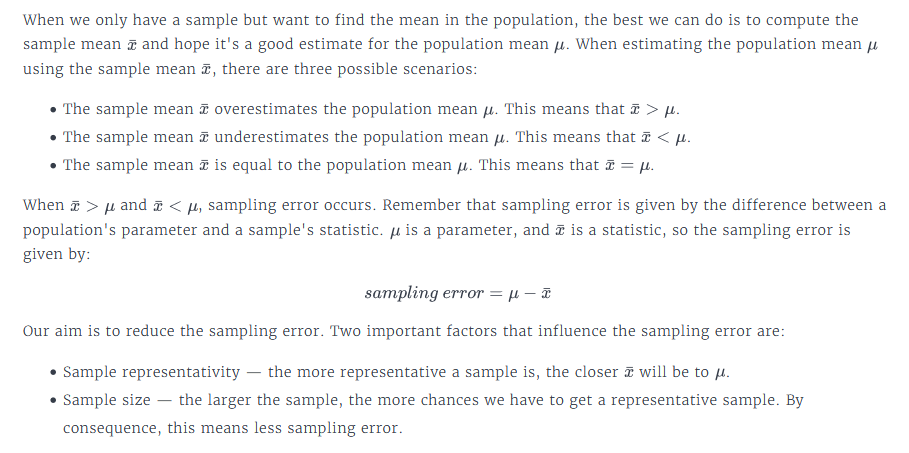

When a statistic is on average equal to the parameter it estimates, we call that statistic an **unbiased estimator**. In our case, the sample mean x is an unbiased estimator for the population mean u

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dis = [0,2,3,3,3,4,13]

In [3]:
mean = sum(dis)/len(dis)
mean

4.0

In [4]:
#Exploring differences of media
equal_distances = 0
for e in range(5000):
    np.random.seed(e)
    rai = np.random.randint(1000, size =10)
    meani = rai.mean()
    sui = 0
    sua = 0
    for u in rai:
        if meani <  u:
            sui += round(u-meani,1)
        if meani > u:
            sua += round(meani-u,1)
    if round(sui,1) == round(sua,1):
        equal_distances += 1
    else:
        print(sua,sui)
equal_distances ## All distances are equal

5000

In [5]:
##Calculation of media by using a built up function
np.random.seed(3)
dist = np.random.randint(1000, size =10)
su = 0
n = len(dist)
for e in dist:
    su += e
media = su/n
media

676.8

In [6]:
dist.mean()

676.8

### Analysing Ames Housing
Ames Housing data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values.

Data set description can be found [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [7]:
housing = pd.read_csv("AmesHousing.txt", sep='\t')

In [8]:
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
#SalePrice is a continuous variable type float
housing.SalePrice.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
pmean = housing.SalePrice.mean()

In [11]:
sampsize = 5
error = []
ssize = []
for e in range(101):
    ssize.append(sampsize)
    sample =housing.SalePrice.sample(n = sampsize,random_state = e)
    sampsize += 29
    smean = sample.mean()
    error.append(pmean - smean)    

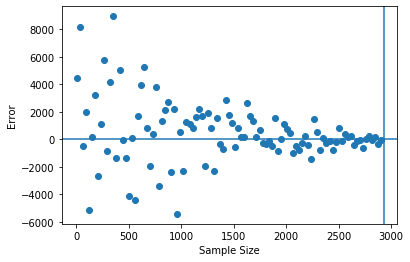

In [12]:
plt.scatter(x = ssize, y =error)
plt.xlabel("Sample Size")
plt.ylabel("Error")
plt.axhline(0)
plt.axvline(2930)
plt.show()

In [13]:
smean = []
for e in range(10000):
    sample =housing.SalePrice.sample(n=100, random_state = e)
    smean.append(sample.mean())

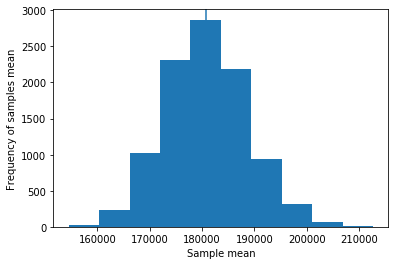

In [14]:
plt.hist(smean)
plt.axvline(pmean)
plt.xlabel("Sample mean")
plt.ylabel("Frequency of samples mean")
plt.show()

# THE WEIGHTED MEAN AND THE MEDIAN

## The weighted Mean.
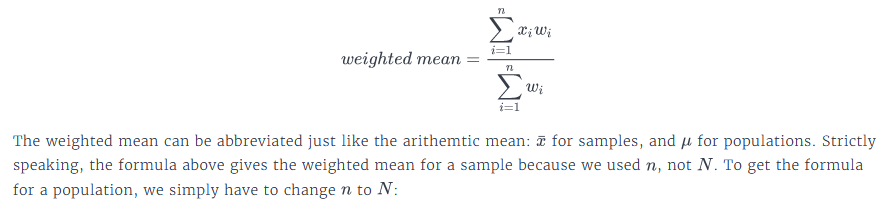

In [15]:
houses_per_year = pd.DataFrame()
houses_per_year["Year"] = [2006,2007,2008,2009,2010]
houses_per_year["Mean_Price"] = [181761.648000,185138.207493, 178841.750804, 181404.567901, 172597.598240]
houses_per_year["Houses_Sold"] = [625,694,622,648,341]
houses_per_year

,Year,Mean_Price,Houses_Sold
0,2006,181761.648000,625
1,2007,185138.207493,694
2,2008,178841.750804,622
3,2009,181404.567901,648
4,2010,172597.598240,341


In [16]:
meanhpy = houses_per_year.Mean_Price.mean()

In [17]:
original_mean = housing.SalePrice.mean()

In [18]:
# There is a difference as we are not counting the weights on each year
difference = meanhpy - original_mean
difference

-847.3055806593911

In [19]:
#calculating the weithged mean
wmean = sum(houses_per_year.Mean_Price*houses_per_year.Houses_Sold)/houses_per_year.Houses_Sold.sum()

In [20]:
difference = round(wmean - original_mean,1)

In [21]:
difference

-0.0

In [22]:
#Function to calculate the weighted mean
def wmean(mean_values, weights):
    tot = sum(mean_values*weights)/sum(weights)
    return tot

In [23]:
wmean(houses_per_year.Mean_Price, houses_per_year.Houses_Sold)

180796.0600682314

In [24]:
# numpy average function to calculate the weighted mean
np.average(a=houses_per_year.Mean_Price, weights= houses_per_year.Houses_Sold)

180796.0600682314

### THE MEDIAN.

#### Open ended ditribution:
Is when the upper or lowest value does not have limit, is open ended distribution

In [25]:
#Example
dis = [9,2,3,5,7,1,"or more",8,11,6]
#First to order the distribution
sorted(dis, key = lambda x : x if str(x).isdigit() else 0)

['or more', 1, 2, 3, 5, 6, 7, 8, 9, 11]

In [26]:
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


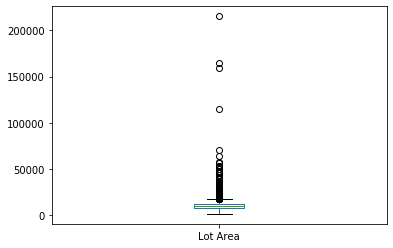

In [27]:
housing["Lot Area"].plot.box()
plt.show()

In [28]:
housing["Lot Area"].median()

9436.5

In [29]:
housing["Lot Area"].mean()

10147.921843003413

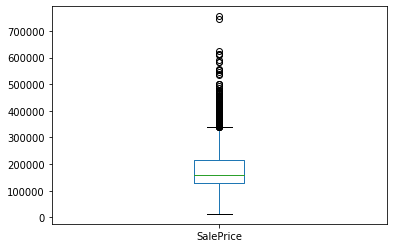

In [30]:
housing.SalePrice.plot.box()
plt.show()

In [31]:
housing.SalePrice.median()

160000.0

In [32]:
housing.SalePrice.mean()

180796.0600682594

### Considering ordinal variables
The Overall Cond variable is registred using ordinal values
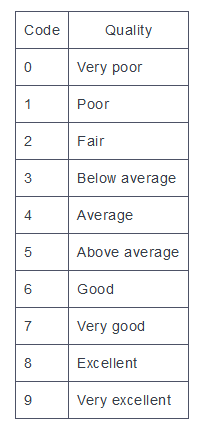

In [33]:
# considering ordinal variables to the mean or median
housing["Overall Cond"].value_counts()

5    1654
6     533
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: Overall Cond, dtype: int64

In [34]:
housing["Overall Cond"].mean()

5.563139931740614

In [35]:
housing["Overall Cond"].value_counts().median()

101.0

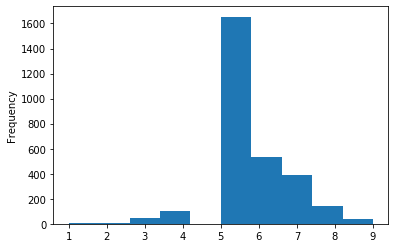

In [36]:
housing["Overall Cond"].plot.hist()
plt.show()

in this case we found the mean more informative and representative than the median

## THE MODE

In [37]:
# Ordinal variable
housing["Land Slope"].value_counts()

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

In [38]:
# Nominal variable
housing["Roof Style"].value_counts()

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64

In [39]:
# Nominal variable
housing["Kitchen AbvGr"].value_counts()

1    2796
2     129
0       3
3       2
Name: Kitchen AbvGr, dtype: int64

In [40]:
# Function to calulate the mode
def mode(array):
    dic = {}
    for e in array:
        if e in dic:
            dic[e] = dic[e] +1
        else:
            dic[e] = 1
    return max(dic,key = dic.get), dic

In [41]:
mode(housing["Roof Style"])

('Gable',
 {'Flat': 20,
  'Gable': 2321,
  'Gambrel': 22,
  'Hip': 551,
  'Mansard': 11,
  'Shed': 5})

In [42]:
housing["Roof Style"].mode()

0    Gable
dtype: object

In [43]:
#Discrete variable
housing["Bedroom AbvGr"].value_counts()

3    1597
2     743
4     400
1     112
5      48
6      21
0       8
8       1
Name: Bedroom AbvGr, dtype: int64

In [44]:
housing["Bedroom AbvGr"].mean()

2.8542662116040955

In [45]:
housing["Bedroom AbvGr"].mode()

0    3
dtype: int64

In [46]:
# Using intervals
intervals = pd.interval_range(start = 0, end = 800000, freq = 100000)
gr_freq = pd.Series([0,0,0,0,0,0,0,0], index = intervals)

In [47]:
for val in housing.SalePrice:
    for e in intervals:
        if val in e:
            gr_freq.loc[e] += 1
            break

In [48]:
gr_freq

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64

In [49]:
# SalePrice mean
housing.SalePrice.mean()

180796.0600682594

In [50]:
# mode of SalePrice
housing.SalePrice.median()

160000.0

The mode for the intervals is 150000 which is near the mean and median 

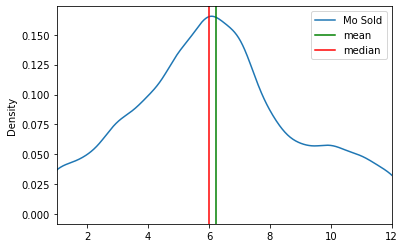

In [51]:
housing["Mo Sold"].plot.kde(xlim = (1,12))
plt.axvline(housing["Mo Sold"].mean(), color ="green", label = "mean")
plt.axvline(housing["Mo Sold"].median(), color = "red", label ="median")
plt.legend()
plt.show()

# MEASURES OF VARIABILITY
If a ditribution A is [4,4,4,4] and B is [0,8,0,8], then we can measure how much they varies

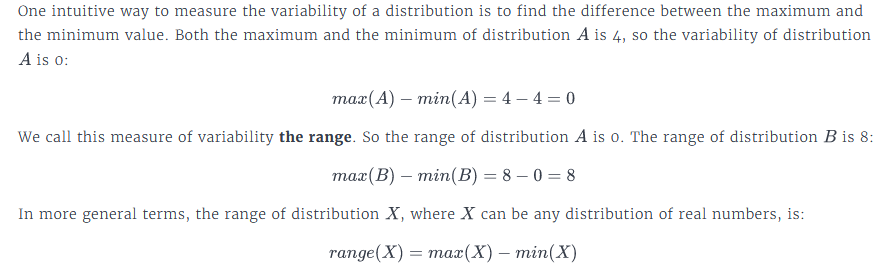

In [52]:
def rang(array):
    return max(array)- min(array)

In [53]:
yvar = housing.groupby("Yr Sold").agg(rang).SalePrice
yvar

Yr Sold
2006    590000
2007    715700
2008    601900
2009    575100
2010    598868
Name: SalePrice, dtype: int64

In [54]:
housing.groupby("Yr Sold").get_group(2006).SalePrice.min()

35000

In [55]:
housing.groupby("Yr Sold").get_group(2006).SalePrice.max()

625000

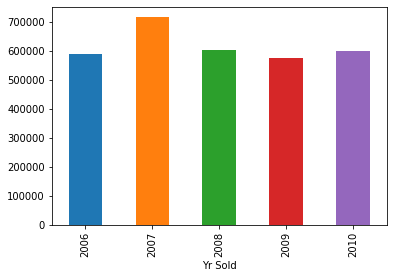

In [56]:
yvar.plot.bar()
plt.show()

There is another way to calculate variability by measuring the distance to a reference point (mean)
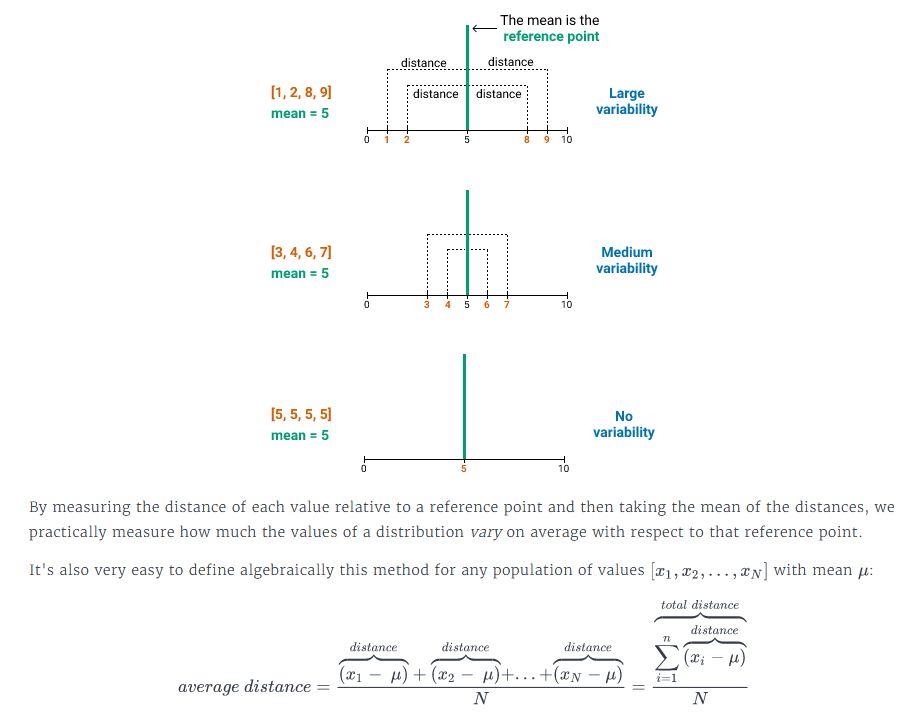

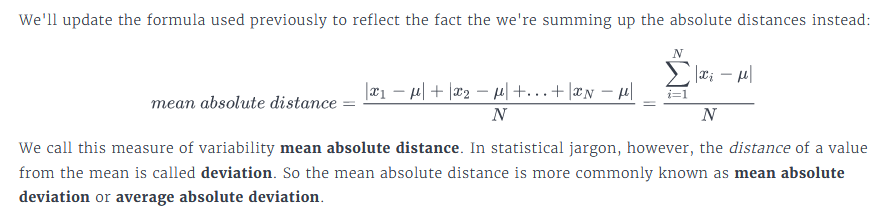

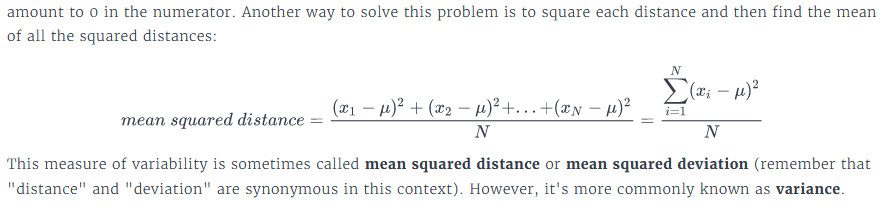

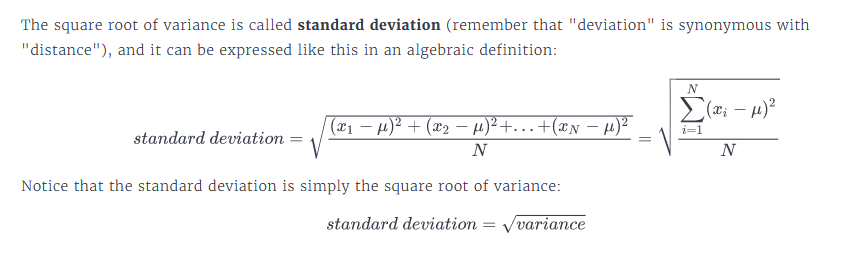

In [81]:
# Fucntion to measure the average variability (Standard Deviation)
import math as m
def var(array):
    mu =array.mean()
    su = 0
    for e in array:
        su += (e-mu)**2
    return m.sqrt(su/len(array))

In [82]:
var(housing.SalePrice)

79873.05865192247

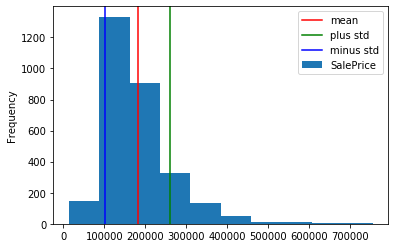

In [83]:
std_dev = var(housing.SalePrice)
mean = housing.SalePrice.mean()
housing.SalePrice.plot.hist()
plt.axvline(mean, color ="red", label = "mean")
plt.axvline(mean +std_dev, color = "green", label ="plus std")
plt.axvline(mean -std_dev, color = "blue", label = "minus std")
plt.legend()
plt.show()

In [84]:
samples = []
ser = housing.SalePrice
for e in range(5000):
    sam = ser.sample(n=10,random_state =e)
    std_sam = var(sam)
    samples.append(std_sam)

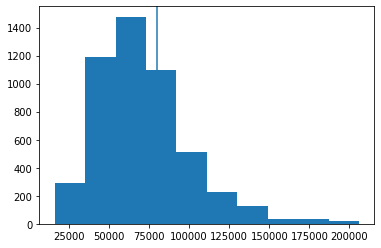

In [85]:
plt.hist(samples)
plt.axvline(var(housing.SalePrice))
plt.show()

On average, the samples standard deviation understimates the population sd, the mayor amount of data is under the population sd.

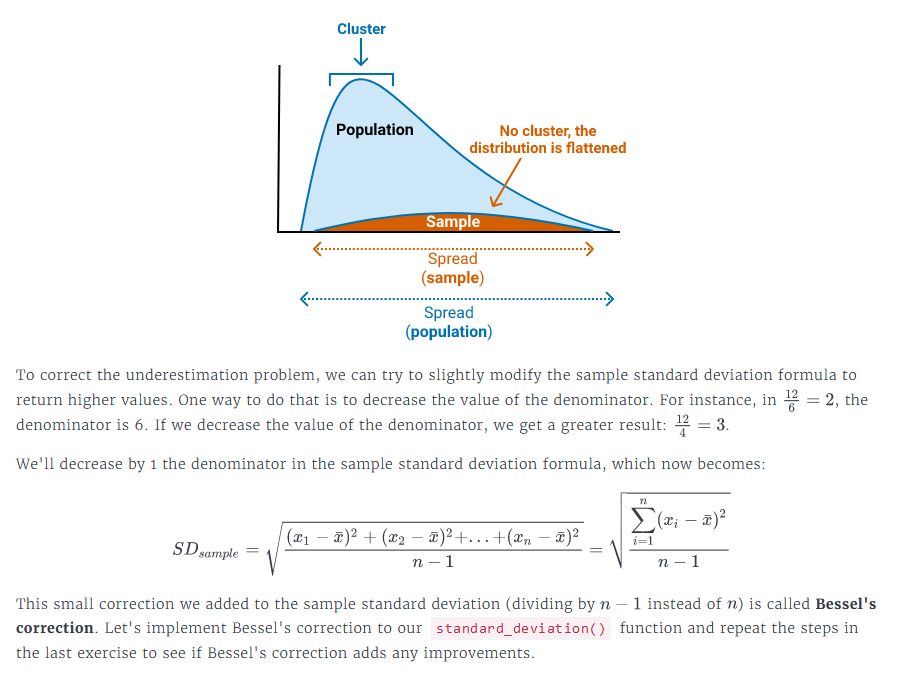

In [78]:
# Fucntion to measure the average variability (Standard Deviation)
import math as m
def var(array):
    mu =array.mean()
    su = 0
    for e in array:
        su += (e-mu)**2
    return m.sqrt(su/(len(array)-1))

In [79]:
samples = []
ser = housing.SalePrice
for e in range(5000):
    sam = ser.sample(n=10,random_state =e)
    std_sam = var(sam)
    samples.append(std_sam)

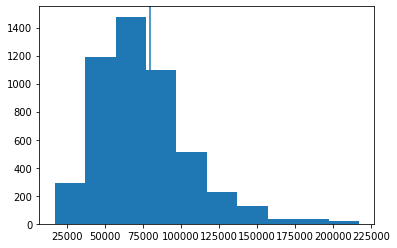

In [80]:
plt.hist(samples)
plt.axvline(var(housing.SalePrice))
plt.show()

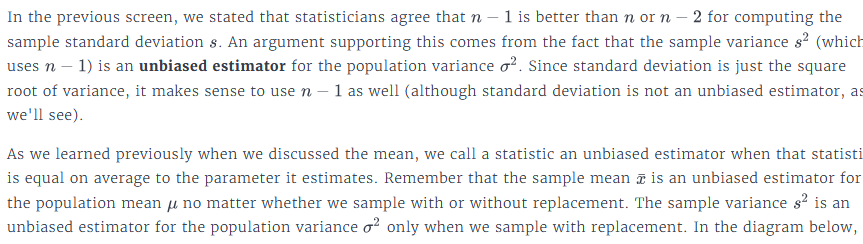